In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
# Load the Financial news dataset
news_data = pd.read_csv("../data/Raw_analyst_ratings.csv")

# View structure of the data
print(news_data.info())
print(news_data.head())

news_data = news_data.dropna(subset=['headline', 'stock'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0  ... stock
0           0  ...     A
1           1  ...     A
2           2  ...     A
3           3  ...     A
4           4  ...     A

[5 rows x 6 columns]


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


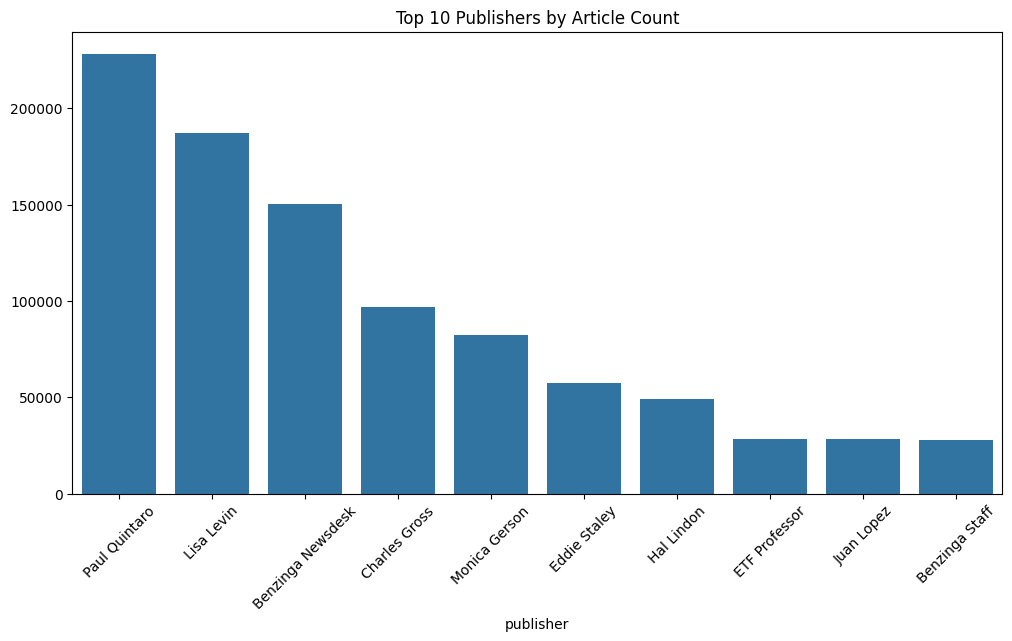

In [7]:
# Headline length
news_data['headline_length'] = news_data['headline'].apply(len)
print(news_data['headline_length'].describe())

# Articles per publisher
publisher_counts = news_data['publisher'].value_counts()

#plot publisher contribution
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts[:10].index, y=publisher_counts[:10].values)
plt.xticks(rotation=45)
plt.title("Top 10 Publishers by Article Count")
plt.show()

In [ ]:
# Sentiment Analaysis
news_data['sentiment_score'] = news_data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
news_data['sentiment_catagory'] = news_data['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# plot sentiment distribution

plt.figure(figsize=(10, 5))
sns.histplot(news_data['sentiment_catagory'])
plt.title("Sentiment Score Distribution")
plt.show()

sentiment_category
Neutral     934914
Positive    341178
Negative    131236
Name: count, dtype: int64


C:\Users\bksam\AppData\Local\Temp\ipykernel_18052\2482052848.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


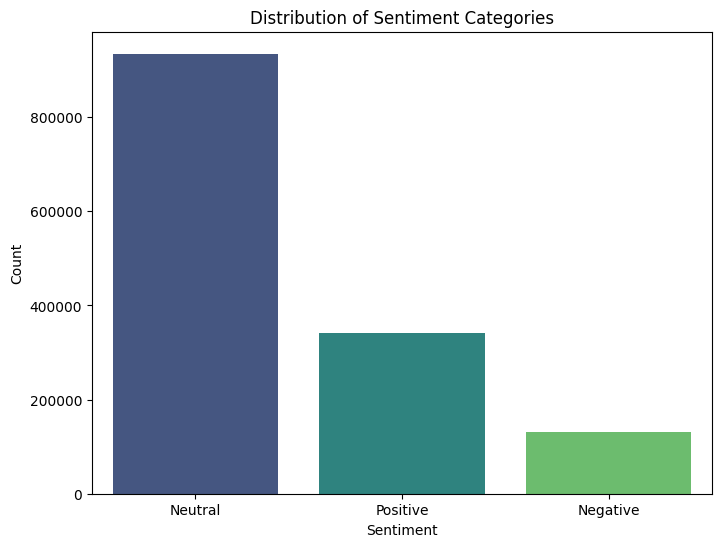

In [12]:
# Perform sentiment analysis
def categorize_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

news_data['sentiment_category'] = news_data['headline'].apply(categorize_sentiment)

# Display sentiment category counts
sentiment_counts = news_data['sentiment_category'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()